day1-prac

In [29]:

import pandas as pd

import numpy as np
# train_test_split is for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("house_prices_dataset.csv")

In [4]:
df.shape

(150, 4)

In [6]:
df.head()

,SquareFootage,NumBedrooms,AgeOfHouse,Price
0,3674,3,18,481447
1,1360,3,82,161140
2,1794,1,66,209513
3,1630,3,54,195619
4,1595,5,35,221977


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SquareFootage  150 non-null    int64
 1   NumBedrooms    150 non-null    int64
 2   AgeOfHouse     150 non-null    int64
 3   Price          150 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB


In [10]:
df.describe()

,SquareFootage,NumBedrooms,AgeOfHouse,Price
count,150.000000,150.000000,150.000000,150.000000
mean,2316.300000,2.846667,49.800000,282033.846667
std,995.142901,1.389011,27.804688,123869.893593
min,521.000000,1.000000,2.000000,34580.000000
25%,1500.250000,1.000000,26.250000,181642.750000
50%,2397.000000,3.000000,48.500000,286746.000000
75%,3181.250000,4.000000,67.000000,384165.500000
max,3999.000000,5.000000,99.000000,511044.000000


In [11]:
df.isnull().sum()

SquareFootage    0
NumBedrooms      0
AgeOfHouse       0
Price            0
dtype: int64

In [14]:
x=df[["SquareFootage",	"NumBedrooms","AgeOfHouse"]]
y=df["Price"]

In [15]:
#feature scaling
s=StandardScaler()
s_features=s.fit_transform(x)
s_data=pd.DataFrame(s_features,columns=["SquareFootage","NumBedrooms","AgeOfHouse"])
s_data["Price"]=y



In [19]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=model.predict(x_test)

In [26]:
np.array(y_test)

array([384915, 511044, 187203, 336674, 312412,  95984, 477186, 443750,
       332867, 153433,  65023, 331645, 209124, 198658, 190479, 216489,
       170069, 184151, 329023, 309088, 140455, 254910, 185656,  62804,
       298917, 264955, 174898, 124547, 408499, 462362], dtype=int64)

In [27]:
y_pred

array([371024.49344769, 503954.94610565, 189265.6584309 , 325522.82284015,
       329548.10400358,  94698.69618249, 462214.14325657, 430800.0987101 ,
       330166.44376793, 172137.3206048 ,  81757.55882532, 326510.88221852,
       213568.19296812, 205933.92975438, 173612.96183184, 232725.24145828,
       172839.39122004, 207615.93372625, 320332.88213061, 330366.660487  ,
       130356.01186206, 257299.03392232, 185249.56570751,  81984.28966934,
       301889.15633517, 277147.44338053, 180494.0949533 , 113257.39786211,
       403576.74461253, 474460.87723141])

In [35]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [36]:
print(mae)
print(mse)
print(r2)


10199.42654783206
146415745.889233
0.9900879804000006


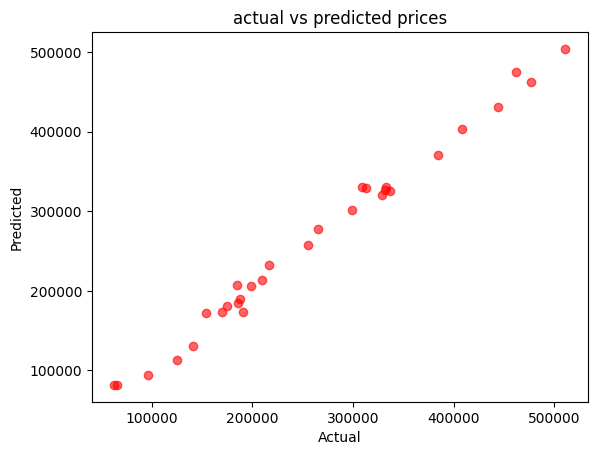

In [38]:
#actual value vs predicted values

import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred,alpha=0.6,color='red')
plt.title("actual vs predicted prices")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

day2-prac

In [1]:

import pandas as pd

import numpy as np
# train_test_split is for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

In [7]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dragonheir/logistic-regression")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 3.27k/3.27k [00:00<00:00, 764kB/s]

Extracting files...
Path to dataset files: C:\Users\SAI KIRAN\.cache\kagglehub\datasets\dragonheir\logistic-regression\versions\1


In [11]:
df=pd.read_csv("Social_Network_Ads.csv")

In [42]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [23]:

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [24]:
x=df.drop(columns=["Purchased"])
y=df["Purchased"]

In [25]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,train_size=0.8,random_state=42)

In [26]:
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)



In [27]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred=model.predict(x_test)

In [29]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [30]:
np.array(y_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [49]:
accuracy=accuracy_score(y_test,y_pred)

In [38]:
accuracy*100

87.5

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        52
           1       0.88      0.75      0.81        28

    accuracy                           0.88        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.88      0.88      0.87        80



In [46]:
def predicts_ads():
    print("/enter the detaits")
    ID=int(input("id :"))
    Gender=int(input("gender:"))
    Age=int(input("age:"))
    EstimatedSalary=int(input("salary:"))

    user_data=pd.DataFrame([[ID,Gender,Age,EstimatedSalary]],columns=x.columns)

    user_data_scaled=s.transform(user_data)

    prediction=model.predict(user_data_scaled)[0]

    result="Yes" if prediction ==1 else "No"
    print(f"Prediction: the user is likely to {result}")

predicts_ads()

/enter the detaits


id : 1098567
gender: 1
age: 48
salary: 480000


Prediction: the user is likely to Yes


test-1-prac

In [50]:
df=pd.read_csv("Heart_Disease_Prediction.csv")

In [51]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [53]:
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

In [54]:
x=df.drop(columns=['Heart Disease'])
y=df['Heart Disease']

In [55]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,train_size=0.8,random_state=42)

In [56]:
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)


In [57]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [58]:
y_pred=model.predict(x_test)

In [70]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], d

In [59]:
np.array(y_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [60]:
accuracy=accuracy_score(y_test,y_pred)

In [61]:
accuracy*100

87.03703703703704

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.79      0.90      0.84        21

    accuracy                           0.87        54
   macro avg       0.86      0.88      0.87        54
weighted avg       0.88      0.87      0.87        54



In [ ]:
def predicts_ads():
    print("/enter the detaits")
    BP=int(input("BP :"))
    Sex=int(input("SEX:"))
    Age=int(input("age:"))
    Chest_pain_type=int(input("Chest_pain_type:"))
    Cholesterol=int(input("Cholesterol :"))
    FBS_over_120=int(input("FBS_over_120:"))
    EKG_results=int(input("EKG_results"))
    Max_HR=int(input("Max_HR:"))
    Exercise_ngina=int(input("Exercise _ngina :"))
    ST_depression=int(input("ST_depression"))
    Number_of_vessels_fluro=int(input("Number_of_vessels_fluro"))
    Thallium=int(input("Thallium"))
    Slope_of_ST=int(input("Slope_of_ST"))

    user_data=pd.DataFrame([[Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_ngina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium]],columns=x.columns)

    user_data_scaled=s.transform(user_data)

    prediction=model.predict(user_data_scaled)[0]

    result="Yes" if prediction ==1 else "No"
    print(f"Prediction: the user is likely to {result}")

predicts_ads()

/enter the detaits


In [63]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


prac day-3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df.shape

(1000, 3)

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
153,6.29,10.0,1
173,6.71,48.0,0
72,7.90,19.0,0
838,6.84,32.0,0
351,6.92,10.0,0


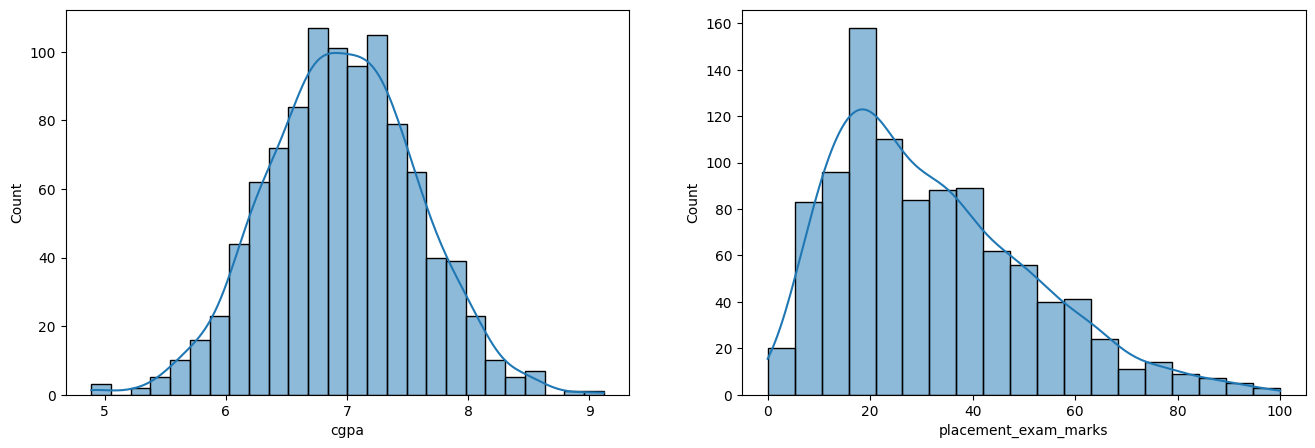

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df["cgpa"],kde=True)
plt.subplot(1,2,2)
sns.histplot(df["placement_exam_marks"],kde=True)

plt.show()

In [7]:
print(df["cgpa"].skew())
print(df["placement_exam_marks"].skew())

-0.014529938929314918
0.8356419499466834


In [8]:
print(df["cgpa"].mean())
print(df["cgpa"].std())
print(df["cgpa"].max())
print(df["cgpa"].min())


6.96124
0.6158978751323896
9.12
4.89


In [9]:
print("high boundary :",df["cgpa"].mean()+ 3*df["cgpa"].std())
print("lower boundary :",df["cgpa"].mean()-3*df["cgpa"].std())

high boundary : 8.808933625397168
lower boundary : 5.113546374602832


##trimming

In [10]:
new_df=df[(df["cgpa"]>5.11 )& (df["cgpa"]<8.80)]

In [11]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


##capping

In [12]:
h=df["cgpa"].mean()+ 3*df["cgpa"].std()
l=df["cgpa"].mean()-3*df["cgpa"].std()

In [13]:
df["cgpa"]=np.where(
    df['cgpa']>h,h,
    np.where(
        df['cgpa']<l,l,
        df["cgpa"]
    )
)

In [14]:
df.describe

<bound method NDFrame.describe of          cgpa  placement_exam_marks  placed
0    7.190000                  26.0       1
1    7.460000                  38.0       1
2    7.540000                  40.0       1
3    6.420000                   8.0       1
4    7.230000                  17.0       0
..        ...                   ...     ...
995  8.808934                  44.0       1
996  8.808934                  65.0       1
997  5.113546                  34.0       0
998  8.620000                  46.0       1
999  5.113546                  10.0       1

[1000 rows x 3 columns]>

#approch 2

In [15]:
df["cgpa_zscore"] = (df["cgpa"] - df["cgpa"].mean()) / df["cgpa"].std()


In [16]:
df[(df["cgpa_zscore"]>3)|(df["cgpa_zscore"]<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,5.113546,44.0,1,-3.016137
995,8.808934,44.0,1,3.015293
996,8.808934,65.0,1,3.015293
997,5.113546,34.0,0,-3.016137
999,5.113546,10.0,1,-3.016137


##trimming

In [17]:
df=df[(df["cgpa_zscore"]<3)&(df["cgpa_zscore"]>-3)]

In [18]:
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.372949
1,7.46,38.0,1,0.813630
2,7.54,40.0,1,0.944202
3,6.42,8.0,1,-0.883807
4,7.23,17.0,0,0.438235
...,...,...,...,...
991,7.04,57.0,0,0.128126
992,6.26,12.0,0,-1.144952
993,6.73,21.0,1,-0.377841
994,6.48,63.0,0,-0.785878


IQR METHOD FOR SKEWNESS

TEST-2

In [64]:
df=pd.read_csv("weight-height.csv")

In [65]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [74]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


<Axes: xlabel='Height', ylabel='Count'>

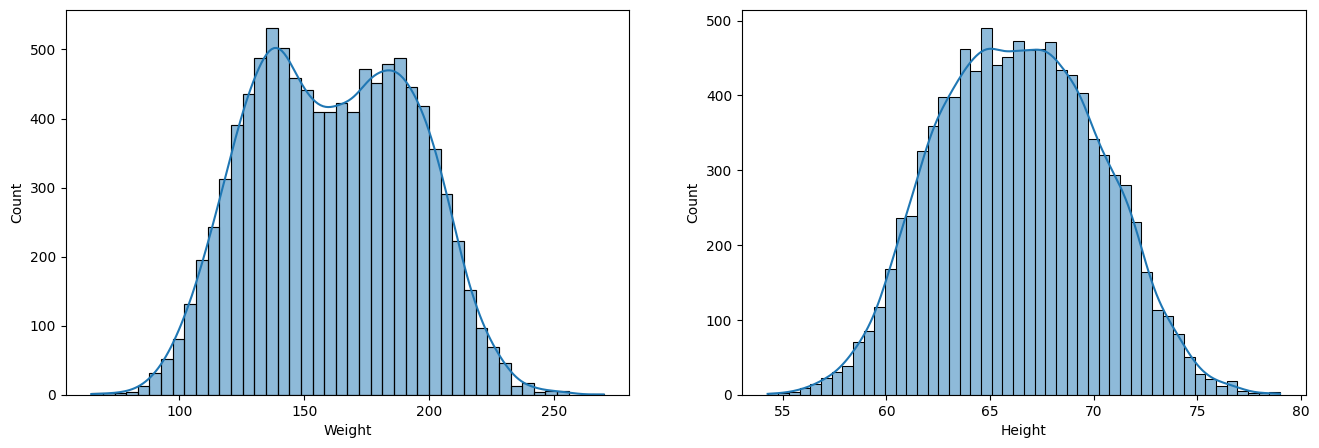

In [75]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df["Weight"],kde=True)
plt.subplot(1,2,2)
sns.histplot(df["Height"],kde=True)

In [76]:
df["Weight"].skew()

0.03295450444592437

In [72]:
df["Height"].skew()

0.04936908937689031

In [77]:
df["Weight_zscore"]=(df["Weight"]-df["Weight"].mean())/df["Weight"].std()

#trimming

In [85]:
df[(df["Weight_zscore"]<3)&(df["Weight_zscore"]>-3)]

,Gender,Height,Weight,Weight_zscore
0,1,73.847017,241.893563,2.505672
1,1,68.781904,162.310473,0.027099
2,1,74.110105,212.740856,1.597726
3,1,71.730978,220.042470,1.825131
4,1,69.881796,206.349801,1.398680
...,...,...,...,...
9995,0,66.172652,136.777454,-0.768113
9996,0,67.067155,170.867906,0.293616
9997,0,63.867992,128.475319,-1.026678
9998,0,69.034243,163.852461,0.075124


project

fake bills with logistic regression

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [13]:
df = pd.read_excel("fake_bills_converted.xlsx")

In [14]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [15]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [16]:
df["margin_low"]=df["margin_low"].fillna(df["margin_low"].mean())

In [17]:
df["is_genuine"].unique()


array([1, 0], dtype=int64)

In [18]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [19]:
x=df.drop(columns=["is_genuine"])
y=df["is_genuine"]

In [20]:
x

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [21]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: is_genuine, Length: 1500, dtype: int64

In [22]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,train_size=0.8,random_state=42)

In [23]:
s=StandardScaler()

In [24]:
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

In [25]:
model=LogisticRegression()

In [26]:
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=model.predict(x_test)

In [28]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], d

In [29]:
np.array(y_test)

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], d

In [30]:
accuracy=accuracy_score(y_test,y_pred)


In [31]:
accuracy

0.99

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



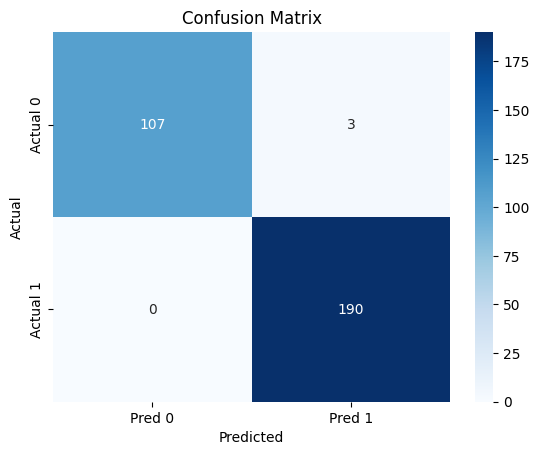

In [40]:
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# Project

In [5]:
!pip install statsmodels


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [7]:
df = pd.read_csv("scrap price.csv", header=0)

In [8]:
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


name, fueltypes, aspiration, doornumbers, carbody, drivewheels, enginelocation, enginetype, cylindernumber, fuelsystem


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                202 non-null    int64  
 1   symboling         202 non-null    int64  
 2   name              202 non-null    int32  
 3   fueltypes         202 non-null    int32  
 4   aspiration        202 non-null    int32  
 5   doornumbers       202 non-null    int32  
 6   carbody           202 non-null    int32  
 7   drivewheels       202 non-null    int32  
 8   enginelocation    202 non-null    int32  
 9   wheelbase         202 non-null    float64
 10  carlength         202 non-null    float64
 11  carwidth          202 non-null    float64
 12  carheight         202 non-null    float64
 13  curbweight        202 non-null    int64  
 14  enginetype        202 non-null    int32  
 15  cylindernumber    202 non-null    int32  
 16  enginesize        202 non-null    int64  
 17  fu

In [107]:
for col in ["name", "fueltypes", "aspiration", "doornumbers", "carbody", "drivewheels", "enginelocation","enginetype","cylindernumber","fuelsystem"]:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print()


Unique values in name:
[  2   3   1   4   5   9   7   6   8  10  11  12  15  13  24  25  26  35
  27  32  34  29  28  30  33  31  39  43  37  38  42  36  41  44  40  47
  45  46  49  48  50  52  51  61  59  58  53  54  60  55  57  56  19  17
  16  22  20  23  62  65  64  68  63  66  67  69   0  73  81  76  83  77
  74  78  70  79  71  72  80  82  75  85  84  86  88  87  92  89  93  91
  94  90  98  95  97  96  99 100 101 103 102 104 107 106 105 108 109 110
 111 123 120 116 121 117 112 125 115 118 114 119 122 126 127 124 113 128
 129 130 133 137 131 136 132 145 146 134 135 139 138 140 141 143 144 142]

Unique values in fueltypes:
[1 0]

Unique values in aspiration:
[0 1]

Unique values in doornumbers:
[1 0]

Unique values in carbody:
[0 2 3 4 1]

Unique values in drivewheels:
[2 1 0]

Unique values in enginelocation:
[0 1]

Unique values in enginetype:
[0 5 3 2 6 4 1]

Unique values in cylindernumber:
[2 3 1 4 5 6 0]

Unique values in fuelsystem:
[5 1 4 0 7 2 3 6]



In [108]:
df.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [118]:
le = LabelEncoder()
for col in ["name", "fueltypes", "aspiration", "doornumbers", "carbody", "drivewheels", "enginelocation","fuelsystem","enginetype","cylindernumber"]:
 df[col] = le.fit_transform(df[col])

C:\Users\SAI KIRAN\AppData\Local\Temp\ipykernel_14788\384146120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\SAI KIRAN\AppData\Local\Temp\ipykernel_14788\384146120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\SAI KIRAN\AppData\Local\Temp\ipykernel_14788\384146120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [119]:
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,136,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,135,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,137,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,139,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [120]:
for col in ["name", "fueltypes", "aspiration", "doornumbers", "carbody", "drivewheels", "enginelocation","fuelsystem","enginetype","cylindernumber"]:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print()


Unique values in name:
[  2   3   1   4   5   9   7   6   8  10  11  12  14  13  21  22  23  32
  24  29  31  26  25  27  30  28  36  40  34  35  39  33  38  41  37  44
  42  43  46  45  47  49  48  58  56  55  50  51  57  52  54  53  17  16
  15  19  18  20  59  62  61  65  60  63  64  66   0  70  78  73  80  74
  71  75  67  76  68  69  77  79  72  82  81  83  85  84  89  86  90  88
  91  87  95  92  94  93  96  97  98 100  99 101 104 103 102 105 106 107
 108 120 117 113 118 114 109 122 112 115 111 116 119 123 124 121 110 125
 126 127 130 134 128 133 129 142 143 131 132 136 135 137 138 140 141 139]

Unique values in fueltypes:
[1 0]

Unique values in aspiration:
[0 1]

Unique values in doornumbers:
[1 0]

Unique values in carbody:
[0 2 3 4 1]

Unique values in drivewheels:
[2 1 0]

Unique values in enginelocation:
[0 1]

Unique values in fuelsystem:
[5 1 4 0 7 2 3 6]

Unique values in enginetype:
[0 5 3 2 6 4 1]

Unique values in cylindernumber:
[2 3 1 4 5 6 0]



#### #feature scaling

In [121]:
x=df.drop(columns=["price"])
y=df["price"]

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [123]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [124]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [125]:
y_pred=model.predict(x_test)

In [126]:
y_pred

array([ 7718.14916098, 22492.36183881,  6177.15384872,  6126.93444074,
        8688.05400981,  5562.76555793, 25824.48871584, 10726.22757172,
        6549.38843621, 15687.2006342 , 23981.46576372,  5847.16554604,
       13152.98925893,  9192.36870874, 14252.71736997, 18128.01134665,
        8518.76295859,  5927.54435258,  9468.74449356, 23761.86947987,
       33988.98534401, 26079.6963596 ,  9422.50362113,  7028.76969527,
       13235.47468467,  9927.67094441, 11637.41167553, 24741.67176995,
       26344.2484931 , 10713.72696751, 16127.76274912,  7978.07228839,
        8688.28498292,  7571.5078719 , 13724.61987727, 16547.80703983,
        6789.76916364,  8755.85413747, 13935.37173256,  9097.04222499,
       14811.75628566])

In [127]:
print(np.array(y_test))

[ 8249.    30760.     6855.     9258.    11595.     5572.    31600.
  9988.     8238.    11048.    25552.     6918.     9989.     8499.
 18420.    22470.    13645.     6938.     6989.    28176.    37028.
 36880.     9495.     7499.    18344.    10595.     9279.    28248.
 31400.5    9960.    17859.167  6295.    11845.     6669.     8449.
 11900.     7053.     7126.     9639.     7689.    12629.   ]


In [128]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [129]:
print(mae)
print(mse)
print(r2)

2814.9682227803123
13158487.349704474
0.8442938849126925


In [130]:
print(mae)
print(mse)
print(r2)

2814.9682227803123
13158487.349704474
0.8442938849126925


MAE (2087.31) → On average, your predictions are off by about 2,087 units from the true value.

 MSE (12,306,121.30) → Average squared error — more sensitive to large errors than MAE.

 R² (0.8441) → Your model explains about 84.4% of the variance in the target variable, which is pretty good.

## Goal
<span style="color:rgb(255,165,0)">
    
### Which variables are significant in predicting the price of a car 

### How well do those variables describe the price of a car
</span>

<span style="color:#00FF00">Bright green text</span>
<span style="color:rgb(255,165,0)">Orange text</span>


Use Ordinary Least Squares (OLS) regression to model the relationship between predictors and price.

This gives you coefficients (effect sizes) for each predictor.

In [131]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

In [132]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     65.76
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           6.08e-76
Time:                        12:46:53   Log-Likelihood:                -1844.1
No. Observations:                 202   AIC:                             3740.
Df Residuals:                     176   BIC:                             3826.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -6.85e+04   1.56e+04     -4.397      0.000   -9.92e+04   -3.78e+04
ID                  17.2242     15.325      1.124      0.263     -13.019      47.468
symboling          169.5141    235.520      0.720      0.473    -295.293     634.321
name               -55.6512     22.328     -2.492      0.014     -99.716     -11.587
fueltypes         7927.9070   5936.245      1.336      0.183   -3787.476    1.96e+04
aspiration         927.0383    796.915      1.163      0.246    -645.700    2499.777
doornumbers      -1503.9515    578.993     -2.598      0.010   -2646.613    -361.290
carbody           -812.0330    329.206     -2.467      0.015   -1461.733    -162.333
drivewheels        956.9898    484.357      1.976      0.050       1.095    1912.885
enginelocation    1.279e+04   1863.501      6.865      0.000    9114.607    1.65e+04
wheelbase          119.5865     96.625      1.238      0.217     -71.106     310.279
carlength          -81.3270     47.514     -1.712      0.089    -175.098      12.444
carwidth           696.4876    237.768      2.929      0.004     227.245    1165.730
carheight          213.0864    121.643      1.752      0.082     -26.981     453.154
curbweight           4.1149      1.459      2.820      0.005       1.236       6.994
enginetype         -17.0960    212.586     -0.080      0.936    -436.642     402.450
cylindernumber     218.5759    340.392      0.642      0.522    -453.199     890.350
enginesize          58.9541     16.271      3.623      0.000      26.842      91.066
fuelsystem          97.4657    136.195      0.716      0.475    -171.320     366.251
boreratio        -1035.1074    977.739     -1.059      0.291   -2964.709     894.495
stroke           -2146.7755    679.079     -3.161      0.002   -3486.962    -806.589
compressionratio   667.3080    427.455      1.561      0.120    -176.289    1510.905
horsepower          26.4721     16.654      1.590      0.114      -6.394      59.338
peakrpm              0.8654      0.594      1.458      0.147      -0.306       2.037
citympg           -124.7998    147.283     -0.847      0.398    -415.468     165.869
highwaympg         121.8359    130.725      0.932      0.353    -136.154     379.826
==============================================================================
Omnibus:                        3.708   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                4.342
Skew:                           0.072   Prob(JB):                        0.114
Kurtosis:                       3.704   Cond. No.                     5.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+05.

p < 0.05 → variable is statistically significant (strong evidence it affects price)

p ≥ 0.05 → variable may not have a meaningful effect in the model

const	    0.000	    ✅ Yes

name	    0.004       ✅ Yes

carbody	    0.019	    ✅ Yes

enginelocat	0.000	    ✅ Yes

carwidth	0.020	    ✅ Yes

carheight	0.049	    ✅ Yes

enginesize	0.000	    ✅ Yes

stroke	    0.000       ✅ Yes

peakrpm	    0.017       ✅ Yes

In [133]:
def backward_elimination(x,y,significance_level=0.05):
 x_modeled=x.copy()
 while True:
     model=sm.OLS(y,x_modeled).fit()
     p_values=model.pvalues
     max_p=p_values.max()
     if max_p>significance_level:
         exclude_var=p_values.idxmax()
         x_modeled=x_modeled.drop(columns=[exclude_var])
     else:
         break
 return x_modeled,model

In [134]:
X_selected, final_model = backward_elimination(x, y)

In [135]:
print(final_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              577.2
Date:                Sun, 10 Aug 2025   Prob (F-statistic):                   2.15e-142
Time:                        12:46:59   Log-Likelihood:                         -1859.1
No. Observations:                 202   AIC:                                      3742.
Df Residuals:                     190   BIC:                                      3782.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

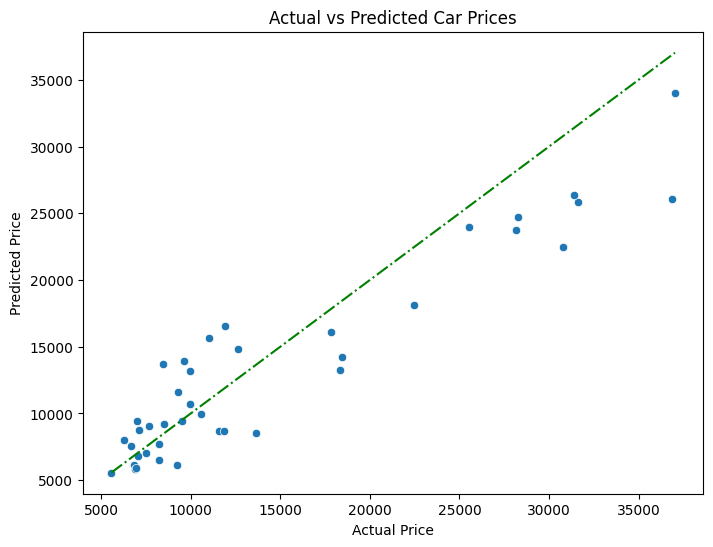

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,6))

# Scatter plot: actual vs predicted
sns.scatterplot(x=y_test, y=y_pred)

# Add diagonal line y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g-.', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')



plt.show()





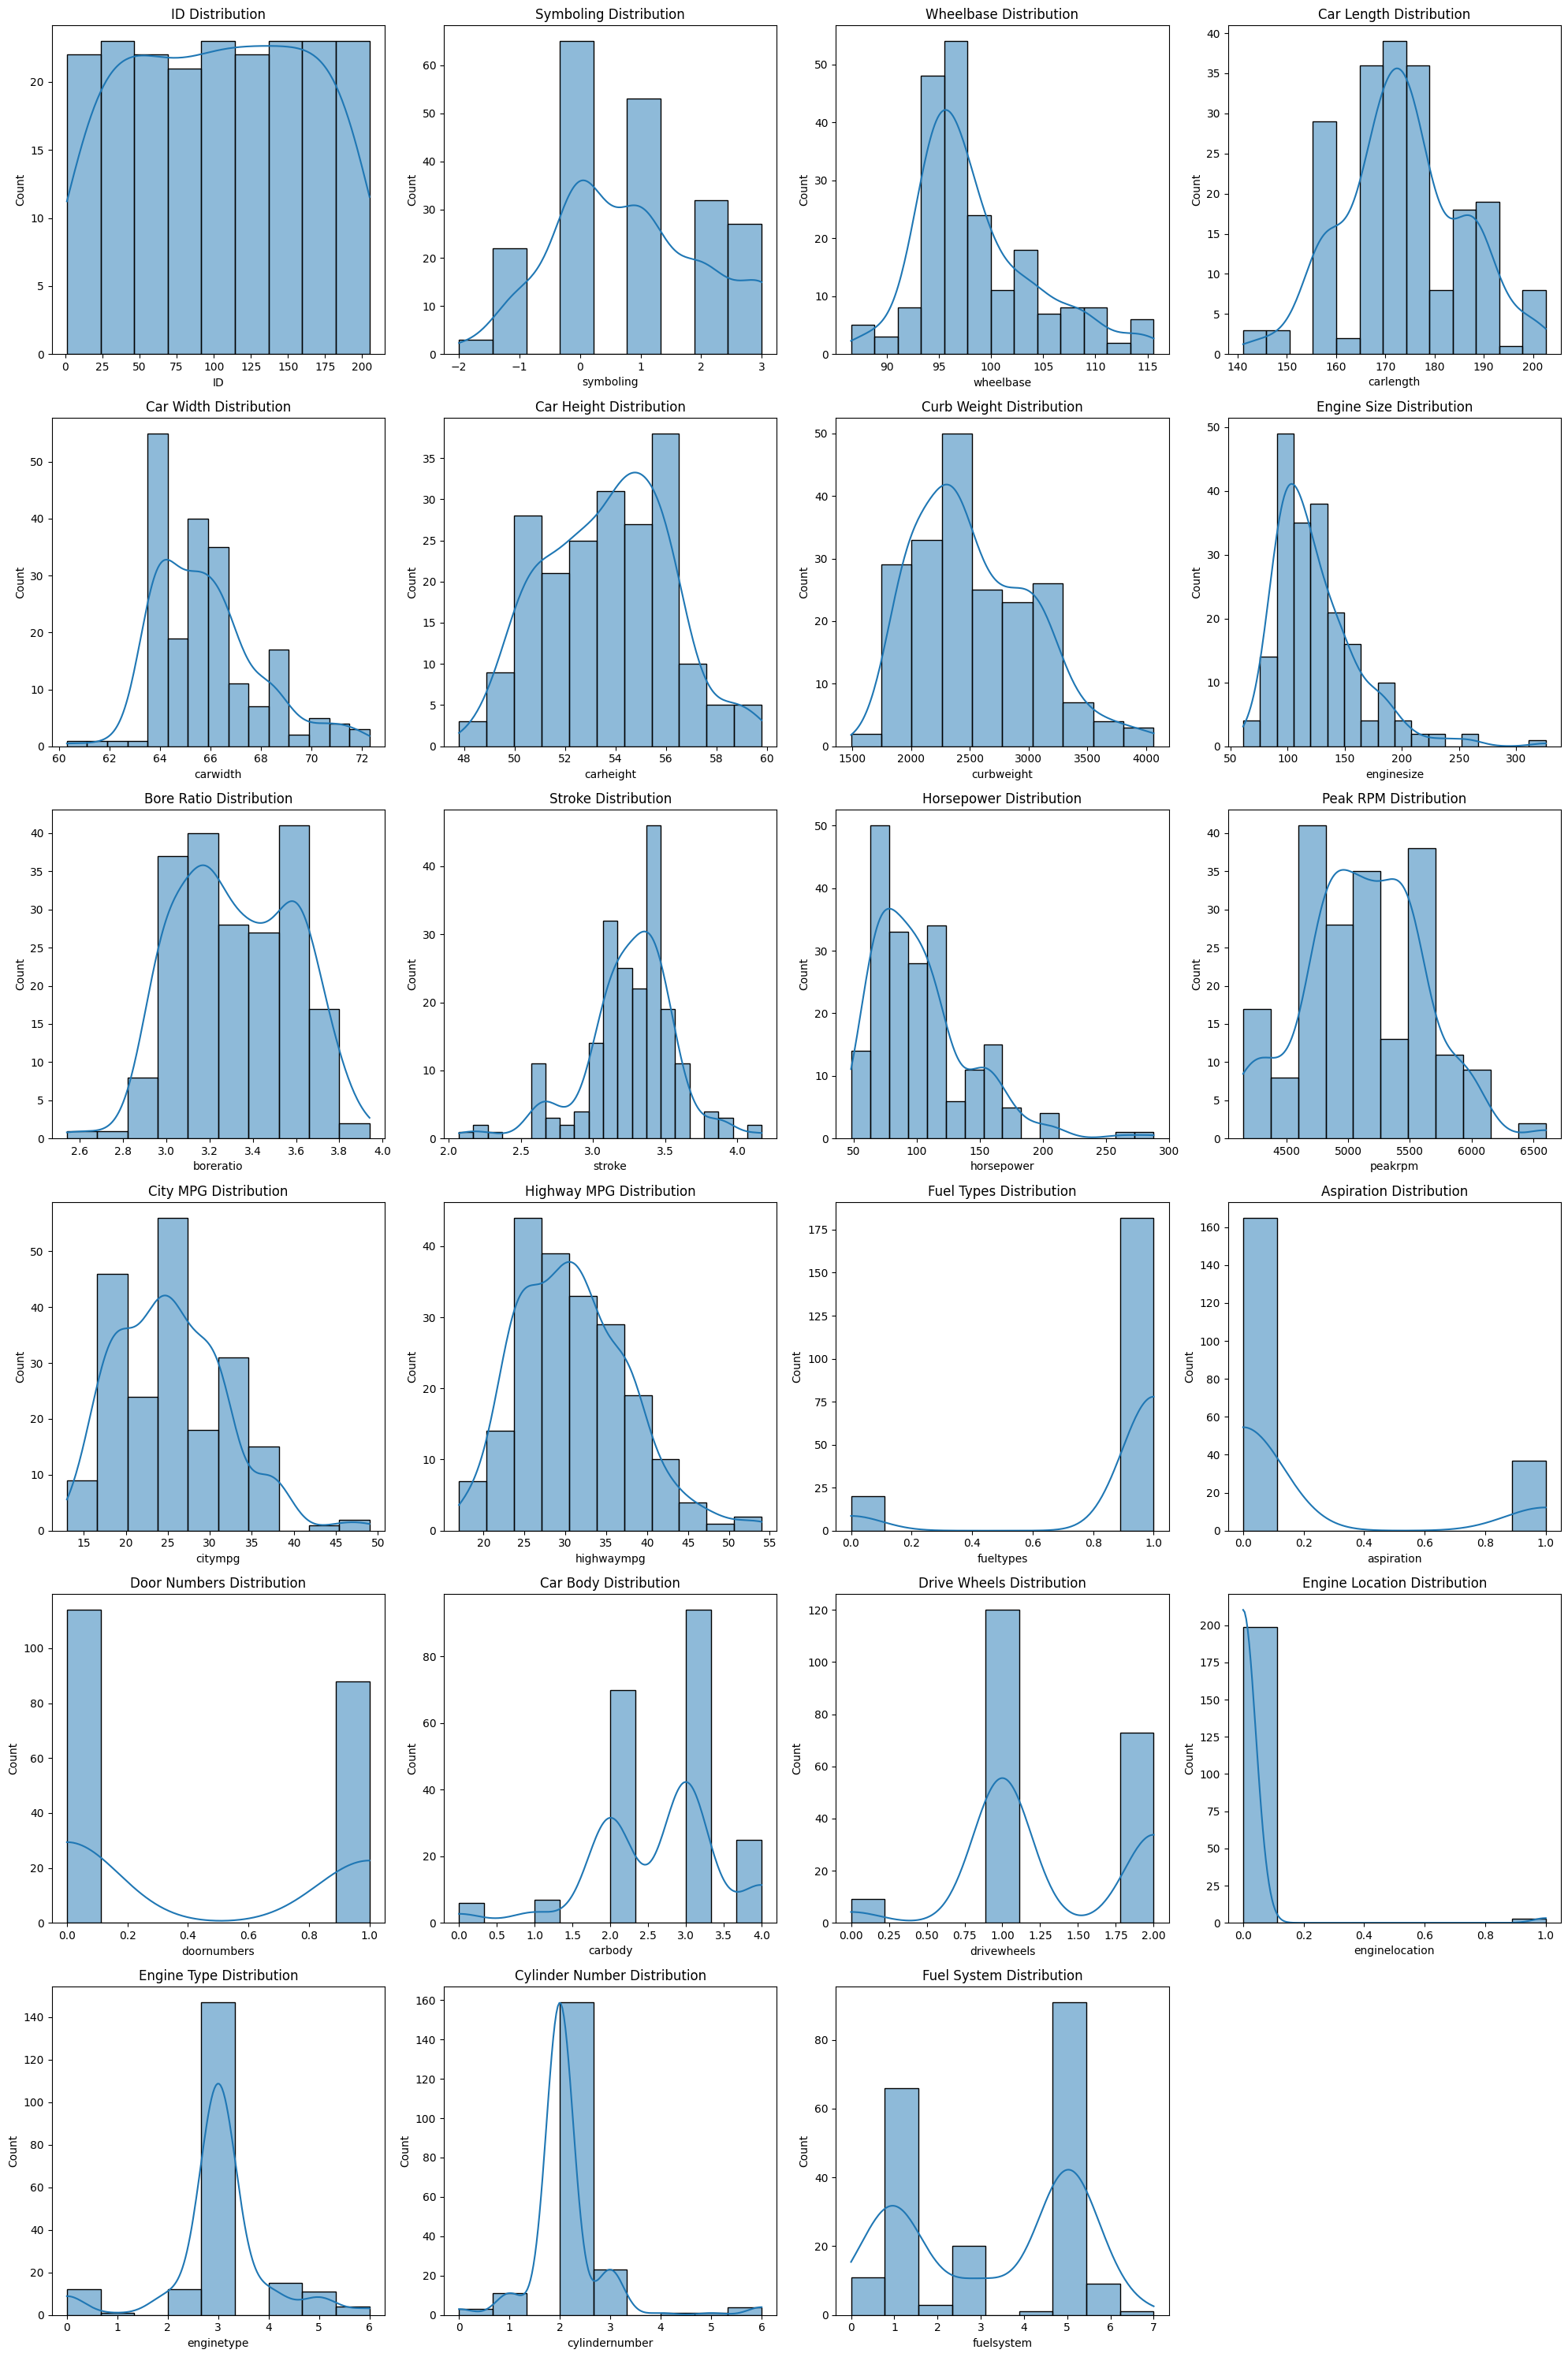

In [138]:
plt.figure(figsize=(20, 30))


plt.subplot(6, 4, 1)
sns.histplot(df["ID"], kde=True)
plt.title("ID Distribution")

plt.subplot(6, 4, 2)
sns.histplot(df["symboling"], kde=True)
plt.title("Symboling Distribution")

plt.subplot(6, 4, 3)
sns.histplot(df["wheelbase"], kde=True)
plt.title("Wheelbase Distribution")

plt.subplot(6, 4, 4)
sns.histplot(df["carlength"], kde=True)
plt.title("Car Length Distribution")


plt.subplot(6, 4, 5)
sns.histplot(df["carwidth"], kde=True)
plt.title("Car Width Distribution")

plt.subplot(6, 4, 6)
sns.histplot(df["carheight"], kde=True)
plt.title("Car Height Distribution")

plt.subplot(6, 4, 7)
sns.histplot(df["curbweight"], kde=True)
plt.title("Curb Weight Distribution")

plt.subplot(6, 4, 8)
sns.histplot(df["enginesize"], kde=True)
plt.title("Engine Size Distribution")


plt.subplot(6, 4, 9)
sns.histplot(df["boreratio"], kde=True)
plt.title("Bore Ratio Distribution")

plt.subplot(6, 4, 10)
sns.histplot(df["stroke"], kde=True)
plt.title("Stroke Distribution")

plt.subplot(6, 4, 11)
sns.histplot(df["horsepower"], kde=True)
plt.title("Horsepower Distribution")

plt.subplot(6, 4, 12)
sns.histplot(df["peakrpm"], kde=True)
plt.title("Peak RPM Distribution")


plt.subplot(6, 4, 13)
sns.histplot(df["citympg"], kde=True)
plt.title("City MPG Distribution")

plt.subplot(6, 4, 14)
sns.histplot(df["highwaympg"], kde=True)
plt.title("Highway MPG Distribution")


plt.subplot(6, 4, 15)
sns.histplot(df["fueltypes"], kde=True)
plt.title("Fuel Types Distribution")

plt.subplot(6, 4, 16)
sns.histplot(df["aspiration"], kde=True)
plt.title("Aspiration Distribution")

plt.subplot(6, 4, 17)
sns.histplot(df["doornumbers"], kde=True)
plt.title("Door Numbers Distribution")

plt.subplot(6, 4, 18)
sns.histplot(df["carbody"], kde=True)
plt.title("Car Body Distribution")

plt.subplot(6, 4, 19)
sns.histplot(df["drivewheels"], kde=True)
plt.title("Drive Wheels Distribution")

plt.subplot(6, 4, 20)
sns.histplot(df["enginelocation"], kde=True)
plt.title("Engine Location Distribution")

plt.subplot(6, 4, 21)
sns.histplot(df["enginetype"], kde=True)
plt.title("Engine Type Distribution")

plt.subplot(6, 4, 22)
sns.histplot(df["cylindernumber"], kde=True)
plt.title("Cylinder Number Distribution")

plt.subplot(6, 4, 23)
sns.histplot(df["fuelsystem"], kde=True)
plt.title("Fuel System Distribution")

plt.tight_layout()
plt.show()

In [59]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [74]:
for col in ['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']:
    skewness = df[col].skew()
    print(f"{col}: {skewness:.4f}")

ID: 0.0000
symboling: 0.2111
name: -0.1576
fueltypes: -2.7326
aspiration: 1.6738
doornumbers: 0.2476
carbody: -0.6653
drivewheels: -0.0584
enginelocation: 8.1435
wheelbase: 1.0502
carlength: 0.1560
carwidth: 0.9040
carheight: 0.0631
curbweight: 0.6814
enginetype: -0.5356
cylindernumber: 2.1443
enginesize: 1.9477
fuelsystem: -0.2430
boreratio: 0.0202
stroke: -0.6897
compressionratio: 2.6109
horsepower: 1.4053
peakrpm: 0.0752
citympg: 0.6637
highwaympg: 0.5400


In [100]:
import numpy as np

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate IQR and detect outliers
for col in numerical_cols:
     u= df[col].mean()+3*df[col].std()
     l= df[col].mean()-3*df[col].std()
    
     new_df=df[(df[col] > l) & (df[col] < u)]
     print(f"Lower Bound: {l:.2f}")
     print(f"Upper Bound: {u:.2f}")
     print(f"Number of Outliers: {len(df[(df[col] < l) | (df[col] > u)])}")
     print("-" * 40)

Lower Bound: -74.97
Upper Bound: 280.97
Number of Outliers: 0
----------------------------------------
Lower Bound: -2.90
Upper Bound: 4.57
Number of Outliers: 0
----------------------------------------
Lower Bound: 80.69
Upper Bound: 116.82
Number of Outliers: 1
----------------------------------------
Lower Bound: 137.04
Upper Bound: 211.06
Number of Outliers: 0
----------------------------------------
Lower Bound: 59.47
Upper Bound: 72.34
Number of Outliers: 0
----------------------------------------
Lower Bound: 46.39
Upper Bound: 61.06
Number of Outliers: 0
----------------------------------------
Lower Bound: 993.53
Upper Bound: 4117.61
Number of Outliers: 0
----------------------------------------
Lower Bound: 1.98
Upper Bound: 251.84
Number of Outliers: 5
----------------------------------------
Lower Bound: 2.52
Upper Bound: 4.14
Number of Outliers: 0
----------------------------------------
Lower Bound: 2.31
Upper Bound: 4.20
Number of Outliers: 3
----------------------------

In [105]:
df=new_df